<hr>
<center><font size='8'>Prediction Using Supervised ML</font>
<br>
<br>
<font size='6'>(Level - Bigginer)</font>
</center>
<hr>

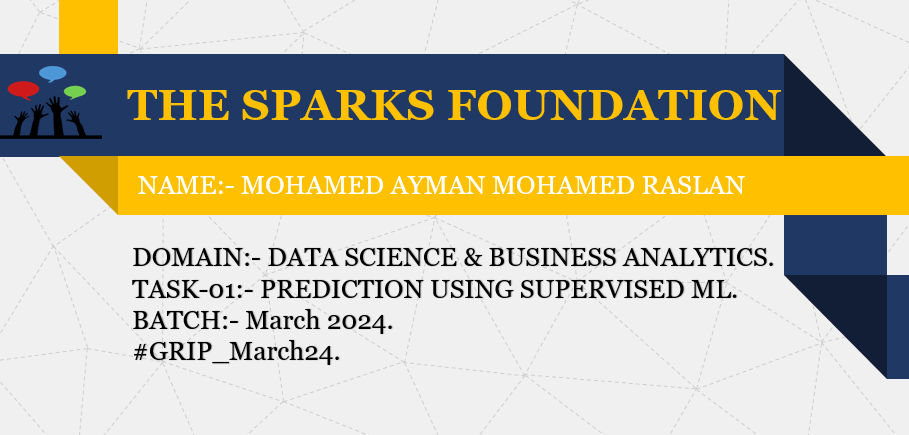
</div>


<hr>

# **(1) Identify Columns**
<hr>

<br>
<center>
<table width="100%">
  <tr>
    <th width="30%"><center><font size="4">Columns</font></center></th>
    <th width="70%"><center><font size="4">Identificarions</font></center></th>
  </tr>
  <tr>
    <td width="30%"><center><font size="3">Hours</font></center></td>
    <td width="70%"><center><font size="3">The Number of Hours of Studying ber Day.</font></center></td>
  </tr>
  <tr>
    <td width="30%"><center><font size="3">Score</font></center></td>
    <td width="70%"><center><font size="3">The Score of The Studentn That Will be Get</font></center></td>
  </tr>
</table>
</center>
<br>

<hr>

# **(2) Import libraries**
<hr>

In [1]:
# for analysis
import numpy as np
import pandas as pd

# for visulization
import matplotlib.pyplot as plt
import seaborn as sns

#for evaluation
from sklearn.metrics import mean_squared_error, r2_score


# for spiliting data
from sklearn.model_selection import train_test_split,cross_val_score


# for buiding model
from sklearn.linear_model import LinearRegression

C:\Users\scs\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<hr>

# **(3) Reading & Showing Data**
<hr>

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

<hr>

# **(3) Reading & Showing Data**
<hr>

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
np.isnan(df).sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df['Hours'].nunique()

23

In [11]:
df.ndim

2

In [12]:
df['Scores'].nunique()

23

In [13]:
df.duplicated().sum()

0

In [14]:
df_correlation = df.corr()
df_correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<hr>

# **(4)Data Visualization**
<hr>

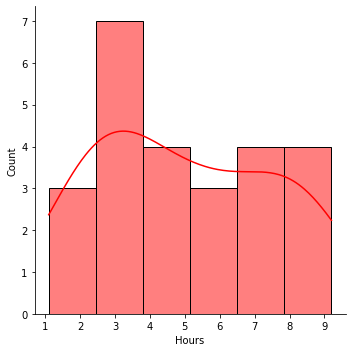

In [15]:
sns.displot( data=df["Hours"], kde=True, color='red' )

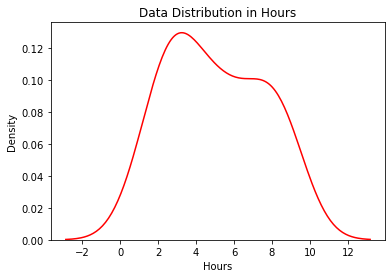

In [16]:
sns.kdeplot(df['Hours'], color='red')
plt.title('Data Distribution in Hours')
plt.xlabel('Hours')
plt.ylabel('Density')
plt.show()

Histogram for Columns


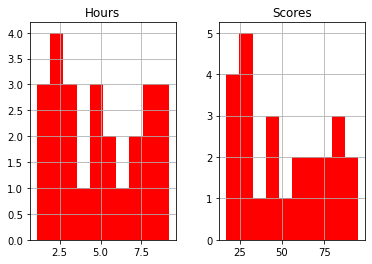

In [17]:
column = df[['Hours', 'Scores']]
print("Histogram for Columns")
column.hist(color='r')
plt.show()

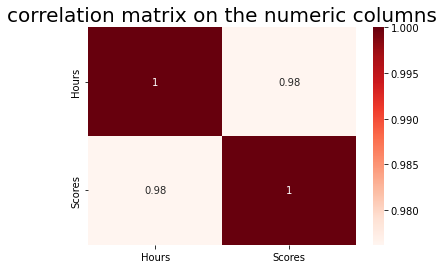

In [18]:
sns.heatmap(df_correlation, annot=True, cmap='Reds')
plt.title('correlation matrix on the numeric columns', size=20)
plt.show()

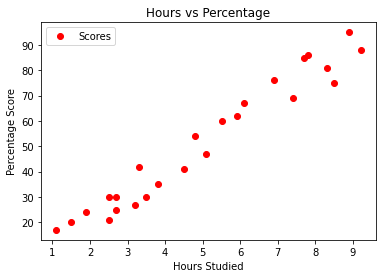

In [19]:
df.plot(x='Hours', y='Scores', style='o', color='r')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<hr>

# **(5)Building Model**
<hr>

In [20]:
X = df[['Hours']].values
y = df[['Scores']].values

In [21]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [22]:
y = y.flatten()

In [23]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0) 

In [25]:
regressor = LinearRegression()  

In [26]:
linear_model = regressor.fit(X_train.reshape(-1,1), y_train) 

In [27]:
Best_Fit_Line = regressor.coef_*X+regressor.intercept_

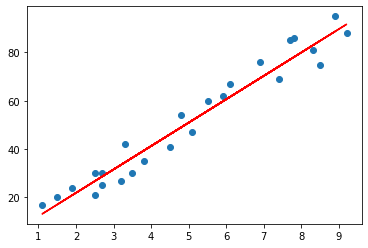

In [28]:
plt.scatter(X, y)
plt.plot(X, Best_Fit_Line,color='red');
plt.show()

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual_Data': y_test, 'Predicted_Data': y_pred}) 
df 

,Actual_Data,Predicted_Data
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [31]:
Training_Score = regressor.score(X_train,y_train)
Test_Score = regressor.score(X_test,y_test)

In [32]:
print("Training Score:", Training_Score)
print("Test Score:", Test_Score)

Training Score: 0.9501107277744313
Test Score: 0.955570080138813


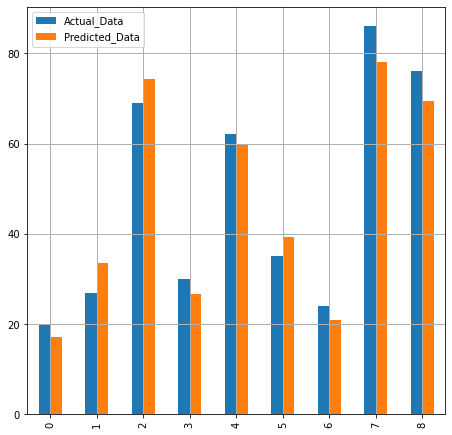

In [33]:
df.plot(kind='bar',figsize=(7.5,7.5))
plt.grid(linewidth='1')
plt.grid(linewidth='1')
plt.show()

In [34]:
hours = 9.25
test_hours = np.array([hours])
test_hours = test_hours.reshape(-1, 1)

In [35]:
test_hours_pred = linear_model.predict(test_hours)

In [36]:
print("Test Hours = {}".format(hours))
print("Predicted Score of Test Hours= {}".format(test_hours_pred[0]))

Test Hours = 9.25
Predicted Score of Test Hours= 92.14523314523314
